# Clustering

In [54]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import seaborn as sns
%matplotlib inline

In [3]:
#Importing data and selecting questions which has answers
a = pd.read_excel('Stack_Overflow_Questions_Clean_EDA_Data.xlsx')
df = a[a['Answer Count']>0]

In [4]:
#Checking the data 
df.head()

,Question Id,Votes,Answer Count,Views,Question,QDescription,User,Reputation Score,Gold Badge Count,Silver Badge Count,Bronze Badge Count,Tags,QDescription length
13,49369729,1,1,14,Challenges with ReadTheDocs,I've been tasked with hosting our Python API d...,Robert_LY,75,0,0,8,python documentation read-the-docs,203
16,49369657,1,1,19,From Python to R - DataFrame from string,I have the following working example in Python...,Jan,20700,5,5,5,python r regex,204
23,49369594,0,1,15,n-depth tree: set parent value based on childr...,In a n-depth dict where values are set in the ...,TMichel,1472,3,3,3,python,204
25,49369548,-2,3,34,Invalid syntax Sum += 1,It says I have invalid syntax at Sum += 1. If ...,jennie saldana,1,0,0,3,python list int,203
27,49369523,0,1,16,OSError: [Errno 22] Invalid argument: (Read fi...,I have a geojson file stored on my laptop and ...,otteheng,271,0,2,2,python,204


In [11]:
#Creating text data 
text = list(df['QDescription'])
text[0]

"I've been tasked with hosting our Python API docs for our customers to access.  ReadTheDocs.com was recommended by a colleague.  However, I've had some challenges with it:\r\nThe default approach is to ..."

In [31]:
#Importing Sample Data Created - 1000 Rows which has Manually Labels Assigned
b = pd.read_excel('Sample_Data_1000.xlsx') # Questions
c = pd.read_excel('Clusters_1000.xlsx') # Labels
b.head(1)

,Question Id,Votes,Answer Count,Views,Question,QDescription,User,Reputation Score,Gold Badge Count,Silver Badge Count,Bronze Badge Count,Tags,QDescription length
13,49369729,1,1,14,Challenges with ReadTheDocs,I've been tasked with hosting our Python API d...,Robert_LY,75,0,0,8,python documentation read-the-docs,203


In [33]:
c.head(1)

,Tags,Labels
0,python documentation read-the-docs,Python


In [36]:
#Creating text and target data required for External Evaluation on Sample Data
target1=list(c['Labels'])
text1 = list(b['QDescription'])

# Generating TF_IDF for Text Data

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the TfidfVectorizer 
# set min document frequency to 5

tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=5) 

# generate tfidf matrix for text
dtm= tfidf_vect.fit_transform(text)
print('Original Data',dtm.shape)
dtm.toarray()

# generate tfidf matrix for text1
dtm1= tfidf_vect.fit_transform(text1)
print('\nSample Data',dtm1.shape)
#dtm1.toarray()

Original Data (5698, 2329)

Sample Data (1000, 586)


# PCA for Internal Evaluation

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(dtm.toarray())
data2D = pca.transform(dtm.toarray())

# Clustering Models
1) Hierarchical Clustering
2) k-Means Clustering
3) LDA (Latent Dirichlet Allocation) Clustering


# Hierarchial Clustering

In [15]:
# Internal Evaluation

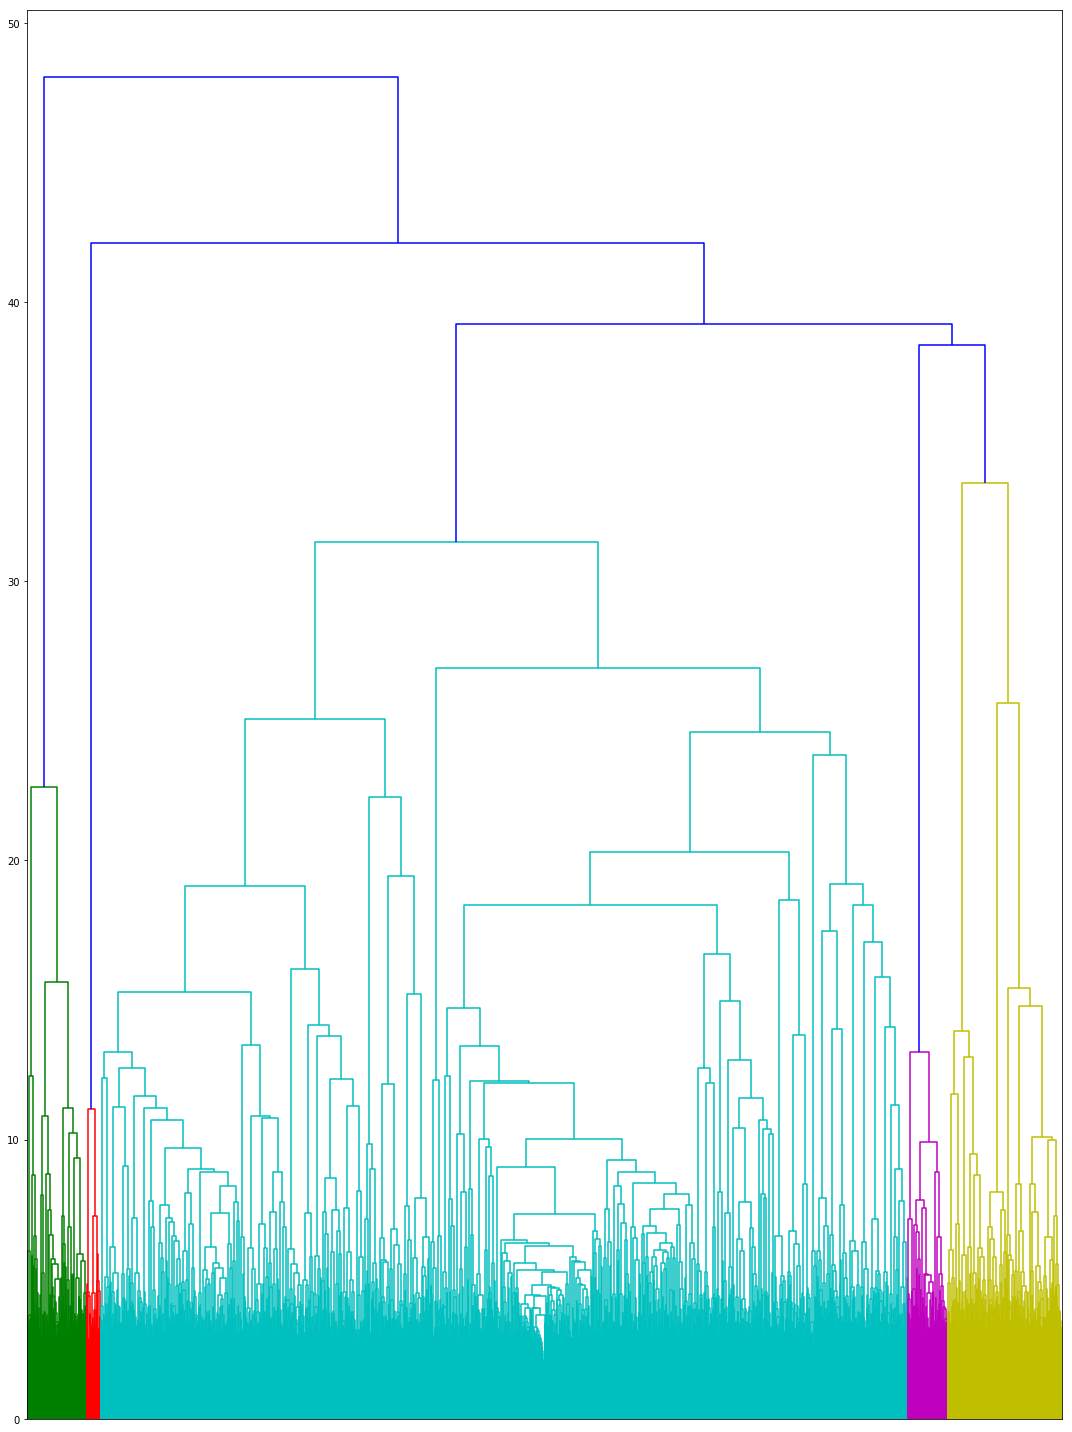

In [16]:
#Hierarchical clustering

from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics.pairwise import cosine_similarity

# distance between any pair of documents
dist = 1 - cosine_similarity(dtm)

# create a linkage matrix using ward's method
# the linkage matrix contains the dendragram data
# in ward methods, the distance between two clusters
# is measured as the sum of distance 
# from each sample to the cluster center 

#linkage_matrix = average(dist)
linkage_matrix = linkage(dist, method='ward')

# plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="top");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [17]:
# Exercise 6.2 Get Clusters

from scipy.cluster.hierarchy import cut_tree

clusters = cut_tree(linkage_matrix,height=25)
clusters=clusters.flatten().tolist()



In [19]:
# Internal Evaluation Co-Efficients

In [20]:
print('Silhouette Co-efficient for Hierarchial Clustering')
print(metrics.silhouette_score(data2D, clusters))

Silhouette Co-efficient for Hierarchial Clustering
-0.00793450533481


In [21]:
print('Calinski-Harabaz Index for Hierarchial Clustering')
print(metrics.calinski_harabaz_score(data2D, clusters))

Calinski-Harabaz Index for Hierarchial Clustering
720.41828936


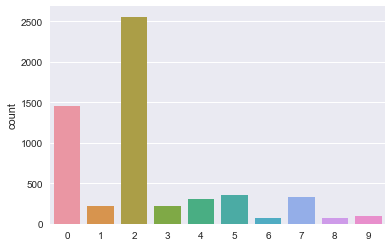

In [23]:
sns.set(style="darkgrid")
sns.countplot(x=clusters)

In [24]:
# Through Internal Evaluation, both the Co-efficient value for Hierarchial Clustering is okay.
# And the clusters formed are quite imbalanced.

In [25]:
# External Evaluation

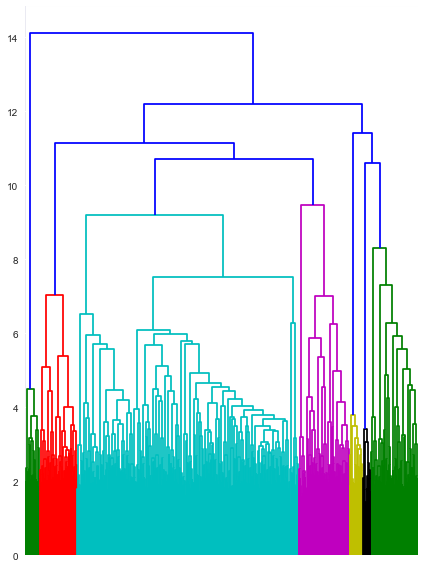

In [39]:
# Exercise 6.1 Hierarchical clustering

from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics.pairwise import cosine_similarity

# distance between any pair of documents
dist = 1 - cosine_similarity(dtm1)

# create a linkage matrix using ward's method
# the linkage matrix contains the dendragram data
# in ward methods, the distance between two clusters
# is measured as the sum of distance 
# from each sample to the cluster center 

#linkage_matrix = average(dist)
linkage_matrix = linkage(dist, method='ward')

# plot the dendrogram
fig, ax = plt.subplots(figsize=(6, 8)) # set size
ax = dendrogram(linkage_matrix, orientation="top");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout



In [40]:
# Exercise 6.2 Get Clusters

from scipy.cluster.hierarchy import cut_tree

clusters = cut_tree(linkage_matrix,height=10.5)
clusters=clusters.flatten().tolist()

# get documents from each clusters and examine the clusters

df=pd.DataFrame(list(zip(target1, clusters)), \
                columns=['actual_class','cluster'])

pd.crosstab( index=df.cluster, columns=df.actual_class)

actual_class,Class,Data Structure,File Handling,Machine Learning,Python,Web Scraping
cluster,,,,,,
0,61,47,100,95,153,109
1,12,6,10,7,44,16
2,25,54,13,15,5,8
3,7,8,20,37,24,34
4,0,15,1,5,8,8
5,0,2,0,15,2,0
6,5,4,0,17,6,2


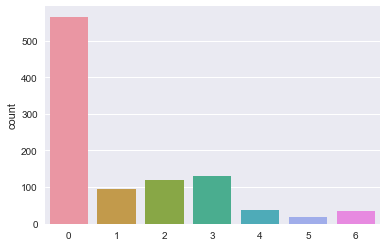

In [41]:
sns.set(style="darkgrid")
sns.countplot(x=clusters)

As we can see from the cross tab and count plot, we cannot identify topics for each cluster.

Cluster 1 contains maximum number of questions and the rest of the clusters have few questions.

Since the clusters assigned are quite imbalance and there is no majority , we are not able to assign questions to clusters.

Thus, we are not able to calculate precision or classification report for Hierarchial Clustering.


# K Means

In [42]:
#Internal Evaluation

In [44]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters,
            n_init=100,                        # number of iterations with different seeds
            random_state=1                    # fixes the seed 
           )

cluster_labels = km.fit_predict(data2D)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters


In [45]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(data2D, cluster_labels)
print(silhouette_avg)

0.359638257509


In [46]:
calinski_harabaz = metrics.calinski_harabaz_score(data2D, cluster_labels)
print(calinski_harabaz)

4188.69355339


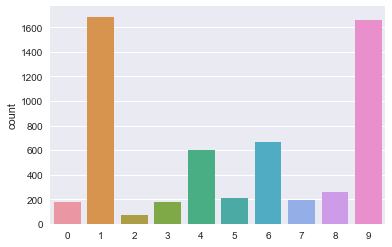

In [47]:
sns.set(style="darkgrid")
sns.countplot(x=cluster_labels)

In [48]:
# Through Internal Evaluation, both the Co-efficient value for K-Means is Good.
# And the clusters formed are okay.

In [49]:
#External Evaluation

In [50]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters,
            n_init=100,                        # number of iterations with different seeds
            random_state=1                    # fixes the seed 
           )

cluster_labels = km.fit_predict(data2D)

In [51]:
df=pd.DataFrame(list(zip(target1, cluster_labels)), \
                columns=['actual_class','cluster'])

pd.crosstab( index=df.cluster, columns=df.actual_class)

actual_class,Class,Data Structure,File Handling,Machine Learning,Python,Web Scraping
cluster,,,,,,
0,12,13,11,13,23,17
1,21,21,19,27,37,27
2,27,30,31,45,65,36
3,3,4,3,9,5,3
4,37,57,68,84,98,83
5,10,11,12,13,14,11


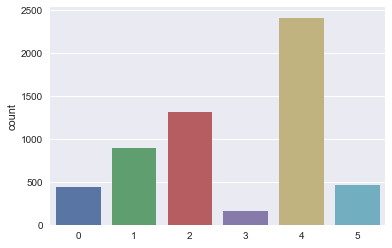

In [52]:
sns.set(style="darkgrid")
sns.countplot(x=cluster_labels)

As we can see from the cross tab and count plot, we cannot identify topics for each cluster.

Cluster 4 contains maximum number of questions and the rest of the clusters have few questions.

Since the clusters assigned are quite imbalance and there is no majority , we are not able to assign questions to clusters.

Thus, we are not able to calculate precision or classification report for k-Means.


# LDA

In [55]:
# Using CountVectorizer to create TF_IDF for LDA Model

In [56]:
# Internal Evaluation

In [57]:
tf_vectorizer = CountVectorizer(min_df=5, stop_words='english')
tf = tf_vectorizer.fit_transform(text)

tf_feature_names = tf_vectorizer.get_feature_names()

In [58]:
#LDA

num_topics = 10

lda = LatentDirichletAllocation(n_components=num_topics, learning_method='batch',\
                                max_iter=50,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(tf)

iteration: 1 of max_iter: 50, perplexity: 1384.6069
iteration: 2 of max_iter: 50, perplexity: 1245.5682
iteration: 3 of max_iter: 50, perplexity: 1156.2105
iteration: 4 of max_iter: 50, perplexity: 1094.6956
iteration: 5 of max_iter: 50, perplexity: 1049.4683
iteration: 6 of max_iter: 50, perplexity: 1015.9801
iteration: 7 of max_iter: 50, perplexity: 993.2073
iteration: 8 of max_iter: 50, perplexity: 975.9708
iteration: 9 of max_iter: 50, perplexity: 963.4734
iteration: 10 of max_iter: 50, perplexity: 953.5496
iteration: 11 of max_iter: 50, perplexity: 946.3539
iteration: 12 of max_iter: 50, perplexity: 940.9961
iteration: 13 of max_iter: 50, perplexity: 936.3878
iteration: 14 of max_iter: 50, perplexity: 932.7422
iteration: 15 of max_iter: 50, perplexity: 929.4325
iteration: 16 of max_iter: 50, perplexity: 926.5646
iteration: 17 of max_iter: 50, perplexity: 923.9936
iteration: 18 of max_iter: 50, perplexity: 921.9823
iteration: 19 of max_iter: 50, perplexity: 919.9590
iteration: 20 o

In [59]:
num_top_words=20

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],topic[i]) for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('data', 238.04914718080886), ('array', 230.09992636579526), ('column', 227.30885401406698), ('values', 216.41437446019043), ('want', 213.56976571960246), ('like', 193.13962829710124), ('dataframe', 169.77165595976459), ('value', 145.12873137705856), ('time', 119.6454936262579), ('row', 117.15105214519295), ('trying', 113.57523791274224), ('rows', 103.76110825011349), ('columns', 102.9993083426771), ('numpy', 101.16074390389723), ('matrix', 90.099936144126204), ('using', 88.069103168762567), ('id', 87.915753110914153), ('python', 87.575507732915327), ('create', 85.626983282480637), ('pandas', 78.205384631313692)]


Topic 1:
[('code', 347.16201560976617), ('input', 284.92857551337318), ('string', 270.02040125786567), ('trying', 229.47342374384425), ('python', 192.51554465521011), ('number', 190.69114205885194), ('print', 190.37922828217384), ('function', 186.40704450195685), ('program', 173.37097376472536), ('want', 158.7142443932255), ('output', 117.89227439534463), ('error',

In [60]:
# Generate topic assignment of each document
topic_assign=lda.transform(tf)

clusters=topic_assign.argmax(axis=1)
# or argsort is also fine

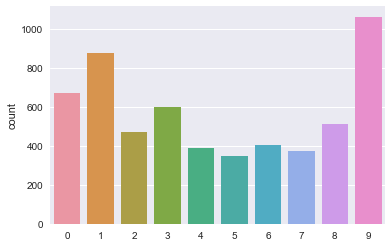

In [61]:
sns.set(style="darkgrid")
sns.countplot(x=clusters)

In [62]:
print('Silhouette Co-efficient for LDA')
print(metrics.silhouette_score(data2D, clusters))

Silhouette Co-efficient for Hierarchial Clustering
-0.130820280743


In [63]:
print('Calinski-Harabaz Index for LDA')
print(metrics.calinski_harabaz_score(data2D, clusters))

Calinski-Harabaz Index for LDA
312.513637043


In [64]:
# Through Internal Evaluation, both the Co-efficient value for Hierarchial Clustering is quite low.
# But the clusters formed are quite good.

In [65]:
# External Evaluation

In [66]:
tf_vectorizer = CountVectorizer(min_df=5, stop_words='english')
tf = tf_vectorizer.fit_transform(text1)

tf_feature_names = tf_vectorizer.get_feature_names()

In [67]:
#LDA

num_topics = 6

lda = LatentDirichletAllocation(n_components=num_topics, learning_method='batch',\
                                max_iter=50,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(tf)

iteration: 1 of max_iter: 50, perplexity: 569.8423
iteration: 2 of max_iter: 50, perplexity: 523.2481
iteration: 3 of max_iter: 50, perplexity: 495.2135
iteration: 4 of max_iter: 50, perplexity: 478.4297
iteration: 5 of max_iter: 50, perplexity: 467.5348
iteration: 6 of max_iter: 50, perplexity: 459.2701
iteration: 7 of max_iter: 50, perplexity: 453.0113
iteration: 8 of max_iter: 50, perplexity: 447.6762
iteration: 9 of max_iter: 50, perplexity: 442.6869
iteration: 10 of max_iter: 50, perplexity: 438.1928
iteration: 11 of max_iter: 50, perplexity: 435.6378
iteration: 12 of max_iter: 50, perplexity: 433.5272
iteration: 13 of max_iter: 50, perplexity: 431.4718
iteration: 14 of max_iter: 50, perplexity: 429.7839
iteration: 15 of max_iter: 50, perplexity: 428.4748
iteration: 16 of max_iter: 50, perplexity: 427.6282
iteration: 17 of max_iter: 50, perplexity: 426.9317
iteration: 18 of max_iter: 50, perplexity: 426.3018
iteration: 19 of max_iter: 50, perplexity: 425.6146
iteration: 20 of max_

In [68]:
# Generate topic assignment of each document
topic_assign=lda.transform(tf)

clusters=topic_assign.argmax(axis=1)
# or argsort is also fine

import pandas as pd

df_lda=pd.DataFrame(list(zip(target1, clusters)), \
                columns=['actual_class','cluster'])
df_lda.head()
pd.crosstab( index=df_lda.cluster, columns=df_lda.actual_class)

actual_class,Class,Data Structure,File Handling,Machine Learning,Python,Web Scraping
cluster,,,,,,
0,103,10,5,5,2,3
1,1,3,2,8,19,145
2,0,2,124,5,3,12
3,3,11,1,157,7,4
4,1,5,10,6,209,9
5,2,105,2,10,2,4


# Classification Report

In [70]:
cluster_dict={0:'Class', 1:"Web Scraping",\
              2:'File Handling', 3:"Machine Learning",\
              4:"Python",5:'Data Structure'}

# Assign true class to cluster
# Some small clusters cannot be mapped to any true class
predicted_target=[cluster_dict[i] for i in clusters ]

                     
print(metrics.classification_report\
      (target1, predicted_target))

                  precision    recall  f1-score   support

           Class       0.80      0.94      0.87       110
  Data Structure       0.84      0.77      0.80       136
   File Handling       0.85      0.86      0.86       144
Machine Learning       0.86      0.82      0.84       191
          Python       0.87      0.86      0.87       242
    Web Scraping       0.81      0.82      0.82       177

     avg / total       0.84      0.84      0.84      1000



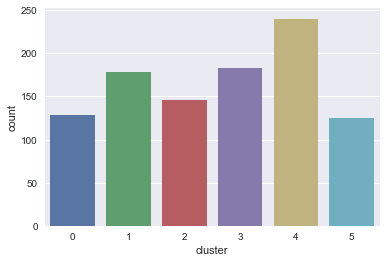

In [71]:
sns.set(style="darkgrid")
sns.countplot(x='cluster',data=df_lda)

# Analysis
With respect to the Internal-External evaluation result,
From Internal Evaluation, the k-Mean model has the best value for both the  co-efficient.
But from External Evaluation, the LDA model is the most efficient approach of clustering data.
Since External Evaluation is much more realistic and efficient in many real-world scenarios as it does not refer to any assumed references from outside which is not always feasible to obtain.
We would select LDA model for Clustering.
